In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('fish.csv')

In [3]:
df

,length,weight,type
0,8.618381,7.848030,tuna
1,2.522046,8.762507,tuna
2,2.035690,7.101971,tuna
3,6.695008,4.953932,salmon
4,9.834069,7.908453,tuna
...,...,...,...
995,3.710186,0.956612,salmon
996,3.749596,9.557450,salmon
997,2.410087,3.355781,tuna
998,0.990773,3.812210,tuna


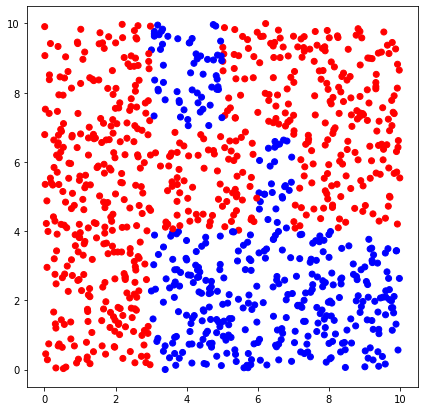

In [4]:
plt.figure(figsize=(7,7))
plt.scatter(df.length, df.weight, color=['red' if t=='tuna' else 'blue' for t in df.type])

In [5]:
df.type = df.type.apply(lambda t: 1 if t == 'salmon' else 0)

In [6]:
df

,length,weight,type
0,8.618381,7.848030,0
1,2.522046,8.762507,0
2,2.035690,7.101971,0
3,6.695008,4.953932,1
4,9.834069,7.908453,0
...,...,...,...
995,3.710186,0.956612,1
996,3.749596,9.557450,1
997,2.410087,3.355781,0
998,0.990773,3.812210,0


In [18]:
def get_entropy(vals):
    p = np.mean(vals)
    if p==0 or p==1:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [23]:
def get_entropy_from_split(df, feature, val):
    left_types = df[df[feature] < val].type
    right_types = df[df[feature] >= val].type
    
    left_entropy = get_entropy(left_types)
    right_entropy = get_entropy(right_types)
    
    left_prop = len(left_types) / len(df)
    right_prop = len(right_types) / len(df)
    
    return left_prop*left_entropy + right_prop*right_entropy

In [27]:
curr_df = df.copy()
curr_df = curr_df[(curr_df.length > 3) & (curr_df.weight > 4)]

In [28]:
features = ['length', 'weight']

best_params = {'feature': None, 'val': None, 'entropy': np.inf}

for f in features:
    curr = curr_df[f].min()
    step = 0.1
    while curr < curr_df[f].max():
        curr_entropy = get_entropy_from_split(curr_df, f, curr)
        if curr_entropy < best_params['entropy']:
            best_params['feature'] = f
            best_params['val'] = curr
            best_params['entropy'] = curr_entropy
        curr += step
print(best_params)

{'feature': 'length', 'val': 7.008879131610914, 'entropy': 0.5524718527527053}
